<img align='left' style='height:100px; width:100px;' src="https://resources.cdn.seon.io/uploads/2022/04/5-types-of-bank-account-fraud_isolated.png"><h1 style='color:red;'>&nbsp;&nbsp;<u>Bank Account Fraud Detection Case Study</u></h1> 

<h3>Import Libraries</h3>

In [1]:
import numpy as np,seaborn as sns,pandas as pd,matplotlib.pyplot as plt,warnings
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score,classification_report
from sklearn.metrics import accuracy_score
from aequitas.group import Group
warnings.filterwarnings("ignore")

<h3>Read CSV</h3>

In [2]:
df=pd.read_csv("Base.csv")

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


<b style="color:blue">Insights</b>
<p><b>In above Dataset, 1422 rows and 21 columns</b><br>fraud_bool label (1 if fraud, 0 if legit)<br>Annual income of the applicant in quantiles. Ranges between [0, 1].<br>name_email_similarity:Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

<b style="color:blue">Insights</b>
<p><b>In above Dataset, 10 Lakhs records and 31 features and 1 target<b></p>

<h3>cleaning</h3>

In [5]:
df.isnull().sum()/len(df)*100

fraud_bool                          0.0
income                              0.0
name_email_similarity               0.0
prev_address_months_count           0.0
current_address_months_count        0.0
customer_age                        0.0
days_since_request                  0.0
intended_balcon_amount              0.0
payment_type                        0.0
zip_count_4w                        0.0
velocity_6h                         0.0
velocity_24h                        0.0
velocity_4w                         0.0
bank_branch_count_8w                0.0
date_of_birth_distinct_emails_4w    0.0
employment_status                   0.0
credit_risk_score                   0.0
email_is_free                       0.0
housing_status                      0.0
phone_home_valid                    0.0
phone_mobile_valid                  0.0
bank_months_count                   0.0
has_other_cards                     0.0
proposed_credit_limit               0.0
foreign_request                     0.0


<b style="color:blue">Insights</b>
<p><b>there is No null data presented in dataset.<b></p>

In [6]:
df.duplicated().any()

False

In [7]:
df.drop(['prev_address_months_count','current_address_months_count'],1,inplace=True)

In [8]:
df.drop(['zip_count_4w','velocity_6h','velocity_24h','velocity_4w','housing_status','phone_mobile_valid','bank_months_count','session_length_in_minutes','keep_alive_session','device_distinct_emails_8w','device_fraud_count'],1,inplace=True)

In [9]:
df.head()

,fraud_bool,income,name_email_similarity,customer_age,days_since_request,intended_balcon_amount,payment_type,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,phone_home_valid,has_other_cards,proposed_credit_limit,foreign_request,source,device_os,month
0,1,0.9,0.166828,50,0.020925,-1.331345,AA,1,6,CA,185,0,1,0,500.0,0,INTERNET,windows,7
1,1,0.9,0.296286,50,0.005418,-0.816224,AB,718,3,CA,259,1,0,0,1500.0,0,INTERNET,windows,7
2,1,0.9,0.044985,40,3.108549,-0.755728,AC,1,14,CB,177,1,0,0,200.0,0,INTERNET,other,7
3,1,0.9,0.159511,50,0.019079,-1.205124,AB,1921,6,CA,110,1,0,1,200.0,0,INTERNET,linux,7
4,1,0.9,0.596414,50,0.004441,-0.773276,AB,1990,2,CA,295,1,1,0,1500.0,0,INTERNET,macintosh,7


<h3>EDA</h3>

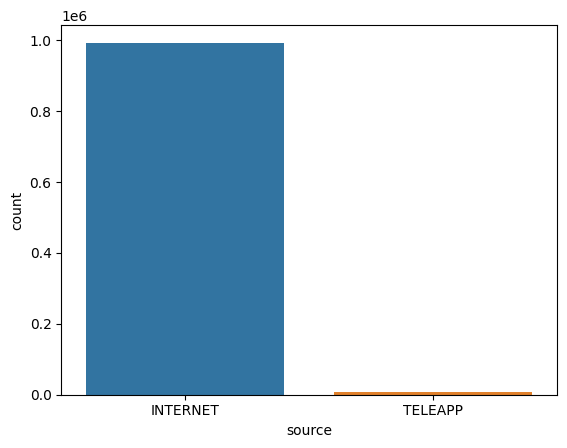

In [10]:
sns.countplot(df['source'])
plt.show()

In [11]:
df['device_os'].value_counts()

other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: device_os, dtype: int64

In [1]:
df['device_os']=df['device_os'].replace('x11','other')
df['device_os'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

NameError: name 'df' is not defined

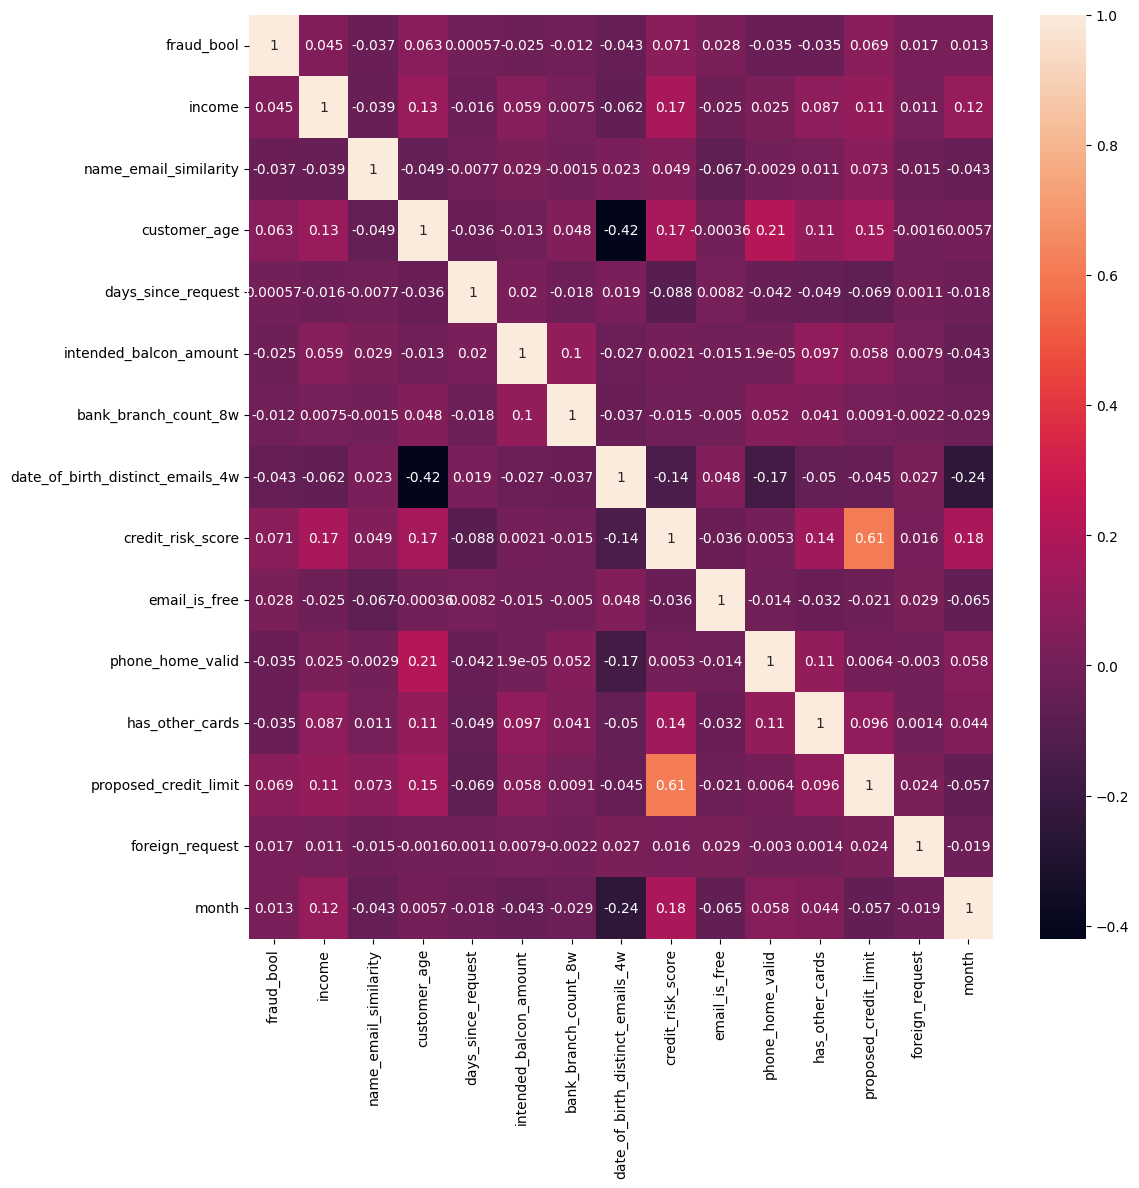

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

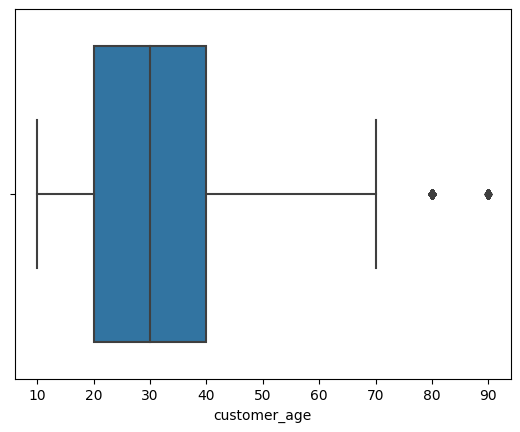

In [14]:
sns.boxplot(df['customer_age'])
plt.show()

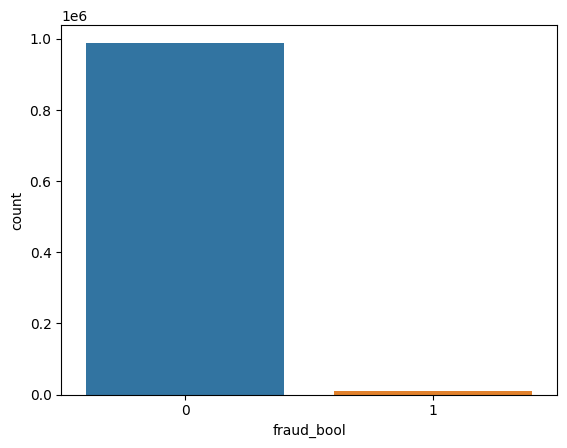

In [15]:
sns.countplot(df['fraud_bool'])
plt.show()

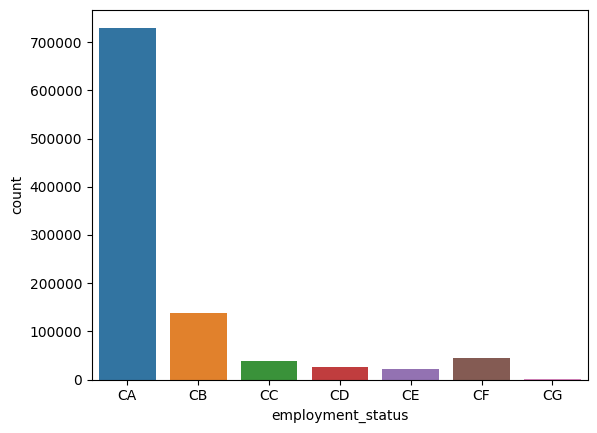

In [16]:
sns.countplot(df['employment_status'])
plt.show()

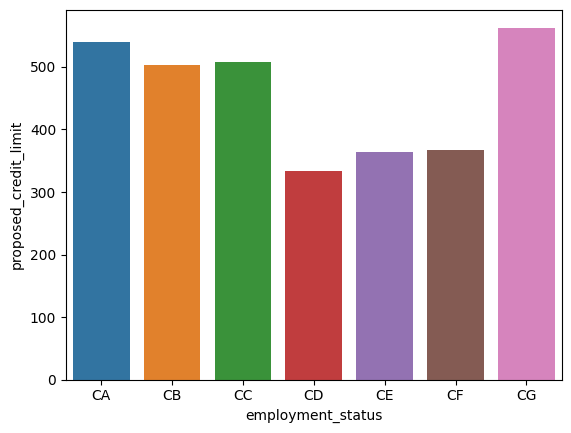

In [17]:
sns.barplot(df['employment_status'],df['proposed_credit_limit'],ci=False)
plt.show()

In [18]:
df['fraud_bool'].value_counts()/len(df)*100

0    98.8971
1     1.1029
Name: fraud_bool, dtype: float64

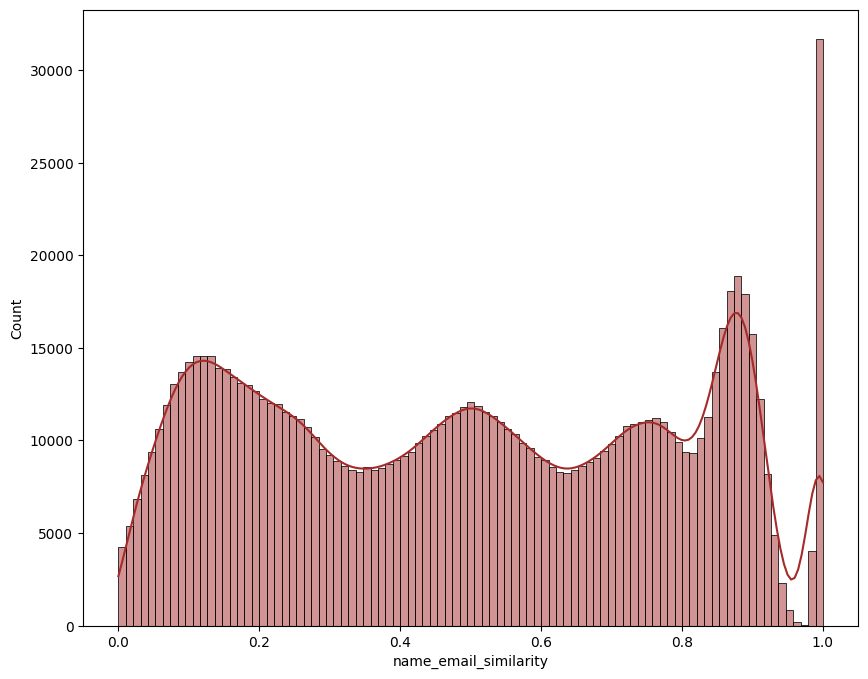

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(df['name_email_similarity'] ,kde=True,color="Brown",palette="bright")
plt.show()

<h3>Encoding</h3>

In [20]:
f={'AA':0,'AB':1,'AC':2,'AD':3,'AE':4}
df['payment_type']=df['payment_type'].map(f)

In [21]:
g={'CA':0,'CB':1,'CC':2,'CD':3,'CE':4,'CF':5,'CG':6}
df['employment_status']=df['employment_status'].map(g)

In [22]:
s={'INTERNET':0, 'TELEAPP':1}
df['source']=df['source'].map(s)

In [23]:
d={'other':0,'windows':1,'linux':2,'macintosh':3}
df['device_os']=df['device_os'].map(d)

<h3>Train and Test Splitting</h3>

In [24]:
X_train, y_train = df[df["month"]<6].drop(columns=["fraud_bool"]), df[df["month"]<6]["fraud_bool"]
X_test, y_test = df[df["month"]>=6].drop(columns=["fraud_bool"]), df[df["month"]>=6]["fraud_bool"]

In [25]:
X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)

<h3>Smote</h3>

In [26]:
from imblearn.over_sampling import SMOTE
r=SMOTE(sampling_strategy='auto')
X_train, y_train=r.fit_resample(X_train,y_train)
X_test, y_test=r.fit_resample(X_test,y_test)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    sns.lineplot(x=[0,0],y=[1,1])
    x = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    plt.plot(x, y,linestyle="--")
    plt.title('ROC curve')
    plt.legend()
    plt.show()

In [29]:
from sklearn.metrics import precision_recall_curve
def pr(model,pred,s):
    p,r,th=precision_recall_curve(y_test,pred)
    plt.title("PR Curve")
    sns.lineplot(x=th,y=p[:-1],label="Precision")
    sns.lineplot(x=th,y=r[:-1],label="Recall")
    plt.axvline(s)
    plt.show()


In [30]:
def evaluate(predictions):
    fprs, tprs, thresholds = roc_curve(y_test, predictions)
    plot_roc(fprs, tprs)

In [31]:
def report(model):
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train report")
    print(classification_report(y_train,y_pred_train))
    print("test report")
    print(classification_report(y_test,y_pred_test))

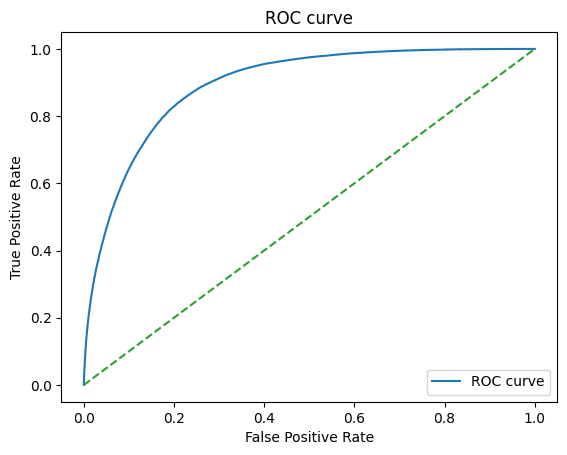

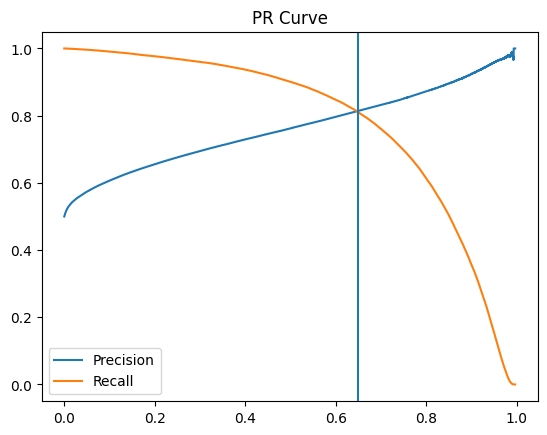

train report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81    786838
           1       0.80      0.83      0.81    786838

    accuracy                           0.81   1573676
   macro avg       0.81      0.81      0.81   1573676
weighted avg       0.81      0.81      0.81   1573676

test report
              precision    recall  f1-score   support

           0       0.88      0.72      0.79    202133
           1       0.76      0.90      0.83    202133

    accuracy                           0.81    404266
   macro avg       0.82      0.81      0.81    404266
weighted avg       0.82      0.81      0.81    404266



In [119]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

predictions=lr.predict_proba(X_test)[:,1]
evaluate(predictions)
pr(lr,predictions,0.65)
report(lr)

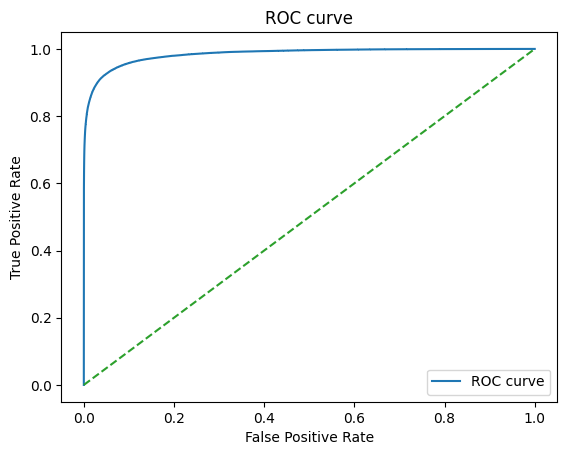

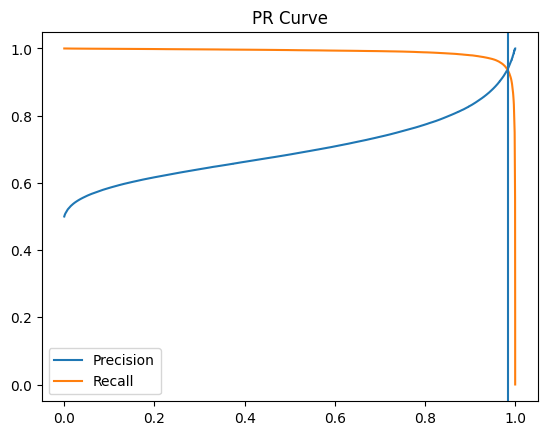

train report
              precision    recall  f1-score   support

           0       1.00      0.61      0.76    786838
           1       0.72      1.00      0.84    786838

    accuracy                           0.80   1573676
   macro avg       0.86      0.80      0.80   1573676
weighted avg       0.86      0.80      0.80   1573676

test report
              precision    recall  f1-score   support

           0       0.99      0.54      0.70    202133
           1       0.68      1.00      0.81    202133

    accuracy                           0.77    404266
   macro avg       0.84      0.77      0.76    404266
weighted avg       0.84      0.77      0.76    404266



In [120]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, scale_pos_weight=89.67005)
xgb.fit(X_train, y_train)
predictions = xgb.predict_proba(X_test)[:,1]
evaluate(predictions)
pr(xgb,predictions,0.985)
report(xgb)

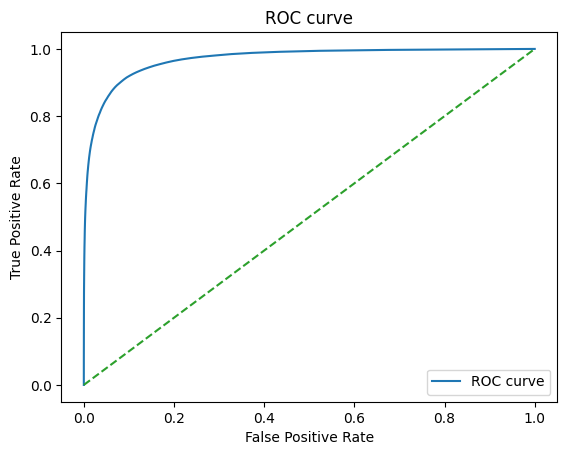

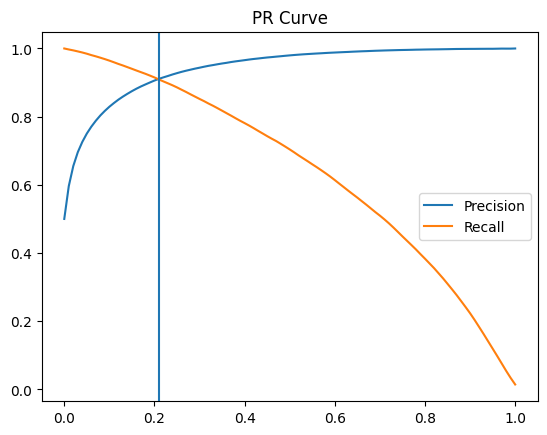

train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    786838
           1       1.00      1.00      1.00    786838

    accuracy                           1.00   1573676
   macro avg       1.00      1.00      1.00   1573676
weighted avg       1.00      1.00      1.00   1573676

test report
              precision    recall  f1-score   support

           0       0.76      0.99      0.86    202133
           1       0.98      0.70      0.81    202133

    accuracy                           0.84    404266
   macro avg       0.87      0.84      0.84    404266
weighted avg       0.87      0.84      0.84    404266



In [34]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
predictions = rf.predict_proba(X_test)[:,1]
evaluate(predictions)
pr(rf,predictions,0.21)
report(rf)

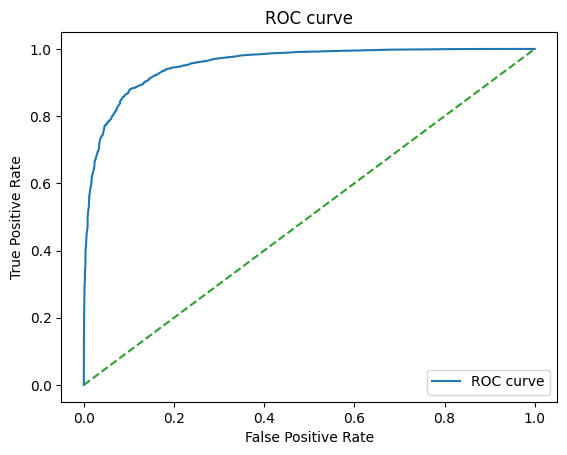

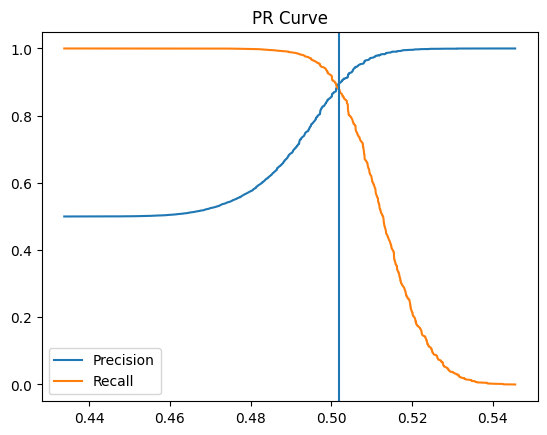

train report
              precision    recall  f1-score   support

           0       0.90      0.87      0.89    786838
           1       0.88      0.91      0.89    786838

    accuracy                           0.89   1573676
   macro avg       0.89      0.89      0.89   1573676
weighted avg       0.89      0.89      0.89   1573676

test report
              precision    recall  f1-score   support

           0       0.91      0.85      0.88    202133
           1       0.86      0.92      0.89    202133

    accuracy                           0.88    404266
   macro avg       0.88      0.88      0.88    404266
weighted avg       0.88      0.88      0.88    404266



In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)
predictions = ada.predict_proba(X_test)[:,1]
evaluate(predictions)
pr(ada,predictions,0.502)
report(ada)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_estimators':[100,200,300,400],
           "learning_rate":[0.1,0.01,0.001,1],
           "algorithm":["SAMME","SAMME.R"]
           }
rscv=RandomizedSearchCV(ada,param_distributions=param_grid,scoring="f1",cv=5,n_jobs=-1)
rscv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.01, 0.001, 1],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='f1')

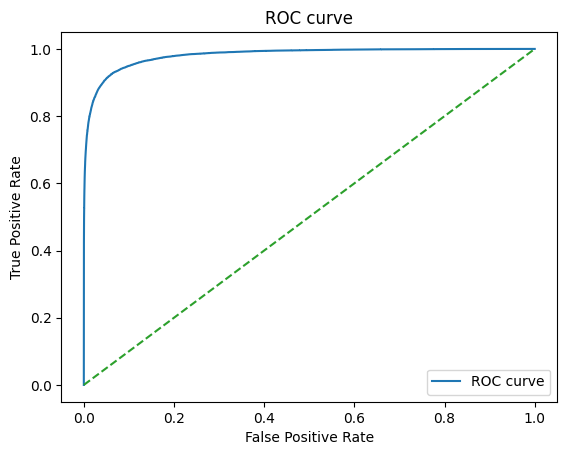

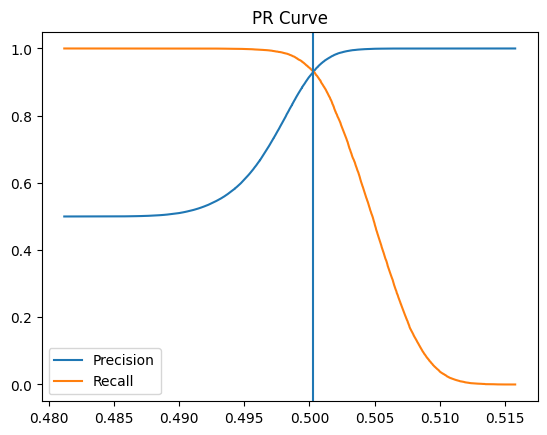

train report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    786838
           1       0.94      0.94      0.94    786838

    accuracy                           0.94   1573676
   macro avg       0.94      0.94      0.94   1573676
weighted avg       0.94      0.94      0.94   1573676

test report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93    202133
           1       0.92      0.94      0.93    202133

    accuracy                           0.93    404266
   macro avg       0.93      0.93      0.93    404266
weighted avg       0.93      0.93      0.93    404266



In [43]:
predictions = rscv.predict_proba(X_test)[:,1]
evaluate(predictions)
pr(rscv,predictions,0.5003)
report(rscv)

In [44]:
d={"Algorithm":["Logistic Regression","XGBClassifier","RandomForestClassifier","AdaBoostClassifier","RandomizedSearchCV"],
  "Train Score":[0.81,0.80,1.00,0.89,0.94],
   "Test Score":[0.81,0.77,0.84,0.88,0.93]
  }
score=pd.DataFrame(d)
score

,Algorithm,Train Score,Test Score
0,Logistic Regression,0.81,0.81
1,XGBClassifier,0.80,0.77
2,RandomForestClassifier,1.00,0.84
3,AdaBoostClassifier,0.89,0.88
4,RandomizedSearchCV,0.94,0.93
